### VAR

In [210]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.base.datetools import dates_from_str
from statsmodels.tsa.api import VAR

from sklearn.metrics import mean_squared_error

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

In [399]:
#Reading HCSBHP into time series formatting

df_HCSBHP = pd.read_csv('../data/HCSBHP.csv')
df_HCSBHP = df_HCSBHP.loc[(df_HCSBHP['p'].isnull()) \
                          & (df_HCSBHP['g'] == '1714000'),['d','v']]
df_HCSBHP = df_HCSBHP[df_HCSBHP['d'].str.len() == 4]

df_HCSBHP['d'] = pd.to_datetime(df_HCSBHP['d'])
df_HCSBHP.set_index('d', inplace = True)
df_HCSBHP.sort_index(inplace= True)
df_HCSBHP.drop('2014-01-01', inplace=True)
df_HCSBHP['v_bhp'] = df_HCSBHP['v']
df_HCSBHP.drop(columns='v', inplace=True)
df_HCSBHP.head()

,v_bhp
d,
2015-01-01,43.000000
2016-01-01,47.900000
2017-01-01,50.300000
2018-01-01,38.400000
2020-01-01,32.172029


In [400]:
#Reading HCSBDP into time series formatting

df_HCSBDP = pd.read_csv('../data/HCSBDP.csv')
df_HCSBDP = df_HCSBDP.loc[(df_HCSBDP['p'].isnull()) \
                          & (df_HCSBDP['g'] == '1714000'),['d','v']]
df_HCSBDP = df_HCSBDP[df_HCSBDP['d'].str.len() == 4]

#Convert date to datetime
df_HCSBDP['d'] = pd.to_datetime(df_HCSBDP['d'])
df_HCSBDP.set_index('d', inplace = True)
df_HCSBDP.sort_index(inplace= True)
df_HCSBDP['v_bdp'] = df_HCSBDP['v']
df_HCSBDP.drop(columns='v', inplace=True)
df_HCSBDP.head()

,v_bdp
d,
2015-01-01,25.400000
2016-01-01,24.200000
2017-01-01,24.800000
2018-01-01,26.400000
2020-01-01,34.532907


In [401]:
#Reading HCSSPDP into time series formatting

df_HCSSPDP = pd.read_csv('../data/HCSSPDP.csv')
df_HCSSPDP = df_HCSSPDP.loc[(df_HCSSPDP['p'].isnull()) \
                          & (df_HCSSPDP['g'] == '1714000'),['d','v']]
df_HCSSPDP = df_HCSSPDP[df_HCSSPDP['d'].str.len() == 4]

#Convert date to datetime
df_HCSSPDP['d'] = pd.to_datetime(df_HCSSPDP['d'])
df_HCSSPDP.set_index('d', inplace = True)
df_HCSSPDP.sort_index(inplace= True)
df_HCSSPDP.drop('2014-01-01', inplace=True)
df_HCSSPDP['v_pdp'] = df_HCSSPDP['v']
df_HCSSPDP.drop(columns='v', inplace=True)
df_HCSSPDP.head()

,v_pdp
d,
2015-01-01,3.200000
2016-01-01,5.400000
2017-01-01,4.800000
2018-01-01,6.600000
2020-01-01,10.021338


In [404]:
#Getting all health data into one Dataframe
df_health = pd.concat([df_HCSSPDP, df_HCSBDP, df_HCSBHP], axis=1)

In [406]:
df_health

,v_pdp,v_bdp,v_bhp
d,,,
2015-01-01,3.200000,25.400000,43.000000
2016-01-01,5.400000,24.200000,47.900000
2017-01-01,4.800000,24.800000,50.300000
2018-01-01,6.600000,26.400000,38.400000
2020-01-01,10.021338,34.532907,32.172029
2021-01-01,9.530436,36.010589,34.042781
2022-01-01,11.271071,35.493399,36.624362


In [443]:
#Loading in our Crime data set
crime_data = pd.read_csv('../data/ts_combined_log.csv')

In [428]:
crime_data.head()

,v_a,v_b,v_h,v_l,v_o,v_p,v_t,v_v
d,,,,,,,,
1985-01-01,10.278631,10.871934,6.501290,11.714960,7.613819,12.301296,10.712527,10.976337
1986-01-01,10.420405,10.938432,6.612041,11.718467,7.872836,12.335644,10.790349,11.085337
1987-01-01,10.439396,10.838600,6.532334,11.694630,7.938802,12.257915,10.590768,11.077563
1988-01-01,10.491108,10.860863,6.492240,11.771313,7.969358,12.331074,10.715506,11.091956
1989-01-01,10.535318,10.851761,6.609349,11.785324,7.848153,12.340888,10.734852,11.155722


In [438]:
crime_data.set_index('d', inplace = True)

### Getting Data to be Stationary

In [316]:
# Code written by Joseph Nelson, from GA VAR lecture
#Tests for stationarity

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [383]:
#HCSBHP differenced only once
interpret_dftest(adfuller(df_HCSBHP['v'].diff().dropna()))

Test Statistic   -3.601993
p-value           0.005723
dtype: float64

In [392]:
#HCSBDP differenced three times
interpret_dftest(adfuller(df_HCSBDP['v'].diff().diff().diff().dropna()))

Test Statistic   -2.397330
p-value           0.142491
dtype: float64

In [393]:
#HCSSPDP differenced 
interpret_dftest(adfuller(df_HCSSPDP['v'].diff().dropna()))

Test Statistic   -4.773158
p-value           0.000061
dtype: float64

In [269]:
#One Difference gets CZA to Stationary
interpret_dftest(adfuller(crime_data['v_a'].diff().dropna()))

Test Statistic   -5.439917
p-value           0.000003
dtype: float64

In [272]:
#One Difference gets CZB To Stationary
interpret_dftest(adfuller(crime_data['v_b'].diff().dropna()))

Test Statistic   -5.924714e+00
p-value           2.459187e-07
dtype: float64

In [276]:
#Two Differences gets CZH To Stationary
interpret_dftest(adfuller(crime_data['v_h'].diff().dropna()))

Test Statistic   -5.836747e+00
p-value           3.860597e-07
dtype: float64

In [279]:
#One Difference gets CZL To Stationary
interpret_dftest(adfuller(crime_data['v_l'].diff().dropna()))

Test Statistic   -5.803112e+00
p-value           4.581910e-07
dtype: float64

In [286]:
#One Difference gets CZP To Stationary
interpret_dftest(adfuller(crime_data['v_p'].diff().diff().dropna()))

Test Statistic   -4.737847
p-value           0.000071
dtype: float64

In [288]:
#Two Differences Gets CZT To Stationary
interpret_dftest(adfuller(crime_data['v_t'].diff().dropna()))

Test Statistic   -5.425019
p-value           0.000003
dtype: float64

In [289]:
##One Difference gets CZV To Stationary
interpret_dftest(adfuller(crime_data['v_v'].diff().dropna()))

Test Statistic   -5.547627
p-value           0.000002
dtype: float64

In [444]:
#Now we create columns of our appropriately differenced data, in order to be stationary
crime_data['first_diff_v_a'] = crime_data['v_a'].diff()
crime_data['first_diff_v_b'] = crime_data['v_b'].diff()
crime_data['first_diff_v_h'] = crime_data['v_h'].diff()
crime_data['first_diff_v_l'] = crime_data['v_l'].diff()
crime_data['second_diff_v_p'] = crime_data['v_p'].diff().diff()
crime_data['first_diff_v_t'] = crime_data['v_t'].diff()
crime_data['first_diff_v_v'] = crime_data['v_v'].diff()

In [407]:
df_health['first_diff_HCSBHP'] = df_health['v_bhp'].diff()
df_health['third_diff_HCSBDP'] = df_health['v_bdp'].diff().diff().diff()
df_health['first_diff_HCSSPDP'] = df_health['v_pdp'].diff()

In [440]:
crime_data.head()

,v_a,v_b,v_h,v_l,v_o,v_p,v_t,v_v,first_diff_v_a,first_diff_v_b,first_diff_v_h,first_diff_v_l,second_diff_v_p,first_diff_v_t,first_diff_v_v
d,,,,,,,,,,,,,,,
1985-01-01,10.278631,10.871934,6.501290,11.714960,7.613819,12.301296,10.712527,10.976337,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-01-01,10.420405,10.938432,6.612041,11.718467,7.872836,12.335644,10.790349,11.085337,0.141774,0.066498,0.110751,0.003507,NaN,0.077822,0.109000
1987-01-01,10.439396,10.838600,6.532334,11.694630,7.938802,12.257915,10.590768,11.077563,0.018991,-0.099832,-0.079707,-0.023837,-0.112076,-0.199582,-0.007775
1988-01-01,10.491108,10.860863,6.492240,11.771313,7.969358,12.331074,10.715506,11.091956,0.051712,0.022263,-0.040094,0.076682,0.150887,0.124739,0.014393
1989-01-01,10.535318,10.851761,6.609349,11.785324,7.848153,12.340888,10.734852,11.155722,0.044210,-0.009101,0.117109,0.014011,-0.063345,0.019346,0.063766


In [408]:
df_health.head()

,v_pdp,v_bdp,v_bhp,first_diff_HCSBHP,third_diff_HCSBDP,first_diff_HCSSPDP
d,,,,,,
2015-01-01,3.200000,25.400000,43.000000,NaN,NaN,NaN
2016-01-01,5.400000,24.200000,47.900000,4.900000,NaN,2.200000
2017-01-01,4.800000,24.800000,50.300000,2.400000,NaN,-0.600000
2018-01-01,6.600000,26.400000,38.400000,-11.900000,-0.800000,1.800000
2020-01-01,10.021338,34.532907,32.172029,-6.227971,5.532907,3.421338


### Train/test Splitting Our Data For Modeling

### Model 1 - Just Crime Data

In [327]:
#Gets a dataframe of only stationary data
stationary_health = crime_data[['first_diff_v_a', 'first_diff_v_b', 'first_diff_v_l']]

stationary_health.dropna(inplace = True)

/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_40727/2759645789.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stationary_health.dropna(inplace = True)


In [358]:
#Doing our train/test split
train, test = train_test_split(stationary_health,
                               test_size = 0.22, shuffle=False)

### Now Modeling VAR

In [359]:
#Creating a VAR model
model = VAR(train)

/Users/connorphillips/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [360]:
#Fitting model, with 2 lags
ts_model = model.fit(maxlags=6, 
                     ic = 'aic')   

In [361]:
#Provides order of model
ts_model.k_ar

6

In [362]:
#Gives Summary of model
ts_model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 05, May, 2023
Time:                     10:42:48
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -14.8211
Nobs:                     22.0000    HQIC:                  -16.9819
Log likelihood:           157.476    FPE:                3.10591e-07
AIC:                     -17.6479    Det(Omega_mle):     4.79850e-08
--------------------------------------------------------------------
Results for equation first_diff_v_a
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                    -0.084228         0.076102           -1.107           0.268
L1.first_diff_v_a         0.244625         0.785676            0.311           0.756
L1.first_diff_v_b        -0.208259 

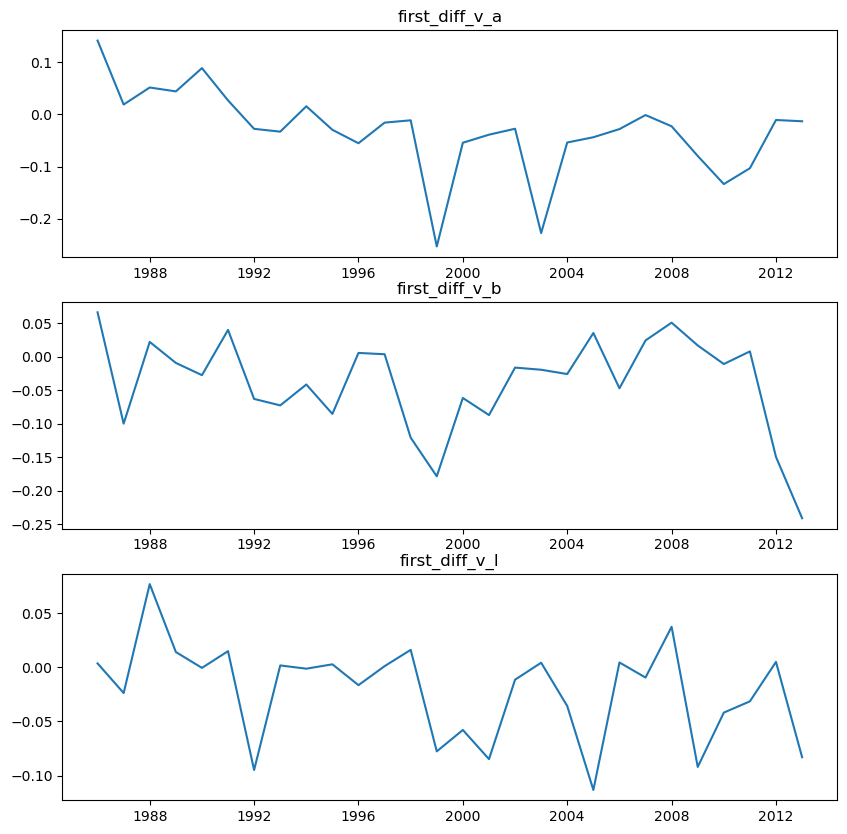

In [363]:
#Plot of training data
ts_model.plot();

This is the stationary training data, and you can see much of the trend is gone, as it is stationary.

### Forecasting

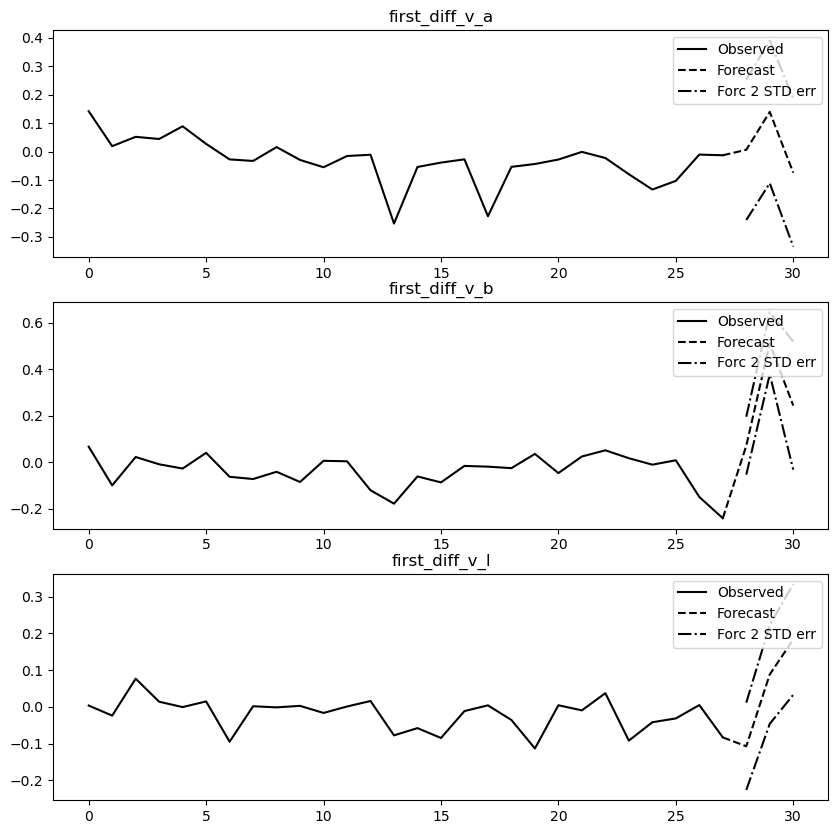

In [364]:
#Forcast for three years ahead
ts_model.plot_forecast(3);

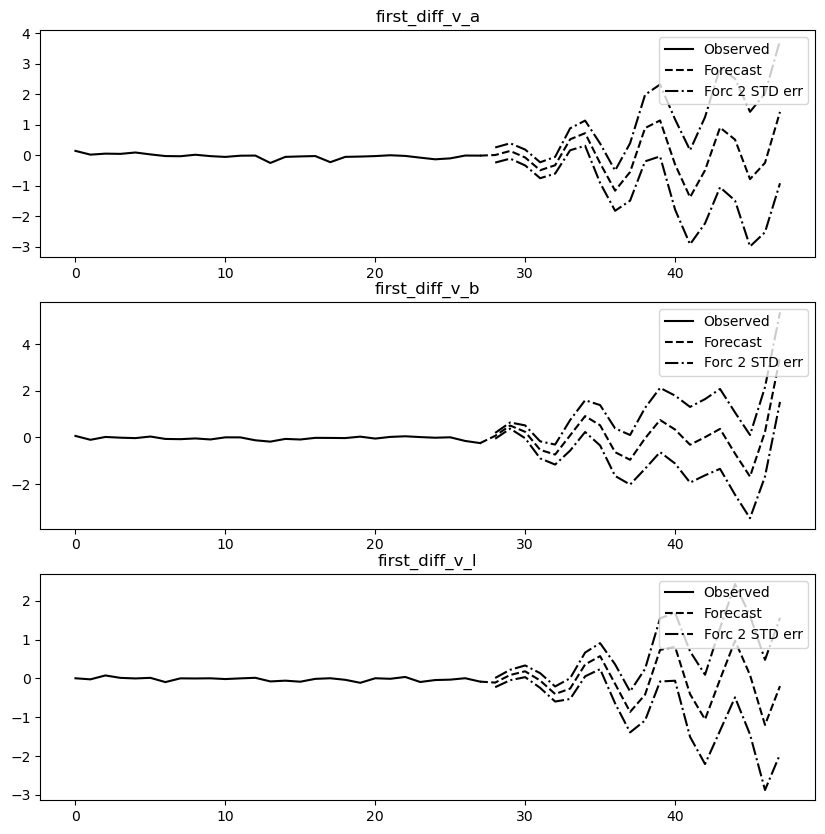

In [312]:
#Forecasting 20 years ahead
ts_model.plot_forecast(20);

In [307]:
#Next years forecast
ts_model.forecast(train.values, 1)

array([[ 0.00617663,  0.07077878, -0.10746105]])

In [308]:
#Next 10 year forecast
ts_model.forecast(train.values, 10)

array([[ 0.00617663,  0.07077878, -0.10746105],
       [ 0.13954457,  0.51140902,  0.08833863],
       [-0.07446144,  0.24343881,  0.18359222],
       [-0.49167678, -0.53203033, -0.05440761],
       [-0.32818249, -0.73386288, -0.40215743],
       [ 0.52127986,  0.09103956, -0.26275807],
       [ 0.72160689,  0.91725637,  0.36063038],
       [-0.261501  ,  0.52322108,  0.57492588],
       [-1.16011364, -0.63112496, -0.14050081],
       [-0.54826507, -0.95870946, -0.86460707]])

In [309]:
#Forecast as long as the data on hand
ts_model.forecast(train.values, len(test))

array([[ 0.00617663,  0.07077878, -0.10746105],
       [ 0.13954457,  0.51140902,  0.08833863],
       [-0.07446144,  0.24343881,  0.18359222],
       [-0.49167678, -0.53203033, -0.05440761],
       [-0.32818249, -0.73386288, -0.40215743],
       [ 0.52127986,  0.09103956, -0.26275807],
       [ 0.72160689,  0.91725637,  0.36063038],
       [-0.261501  ,  0.52322108,  0.57492588],
       [-1.16011364, -0.63112496, -0.14050081]])

### Evaluate Model and Forecasts

In [310]:
forecast = ts_model.forecast(train.values, len(test))

In [311]:
for i in range(test.shape[1]):
    print(f"The test MSE on the {test.columns[i]} data is : {mean_squared_error(test.values[:, i], forecast[:, i])}")

The test MSE on the first_diff_v_a data is : 0.4652320036495474
The test MSE on the first_diff_v_b data is : 0.5004321706629623
The test MSE on the first_diff_v_l data is : 0.31564165185737564


Fairly low MSE, but must keep in mind the log transformation.

### Model 2 - Just Health Data

In [409]:
#Gets a dataframe of only stationary data
stationary_health = df_health[['first_diff_HCSBHP', 'third_diff_HCSBDP', 'first_diff_HCSSPDP']]

stationary_health.dropna(inplace = True)

/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_40727/1137507392.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stationary_health.dropna(inplace = True)


In [410]:
#Doing our train/test split
train, test = train_test_split(stationary_health,
                               test_size = 0.15, shuffle=False)

In [411]:
#Fitting model, with 2 lags
ts_model = model.fit(maxlags=1, 
                     ic = 'aic')  

In [412]:
#Provides order of model
ts_model.k_ar

0

In [413]:
#Gives Summary of model
ts_model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 05, May, 2023
Time:                     12:29:07
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -16.5473
Nobs:                     28.0000    HQIC:                  -16.6464
Log likelihood:           117.470    FPE:                5.64483e-08
AIC:                     -16.6900    Det(Omega_mle):     5.08079e-08
--------------------------------------------------------------------
Results for equation first_diff_v_a
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.031295         0.015226           -2.055           0.040

Results for equation first_diff_v_b
           coefficient       std. error           t-stat            prob
----------------------------------------------

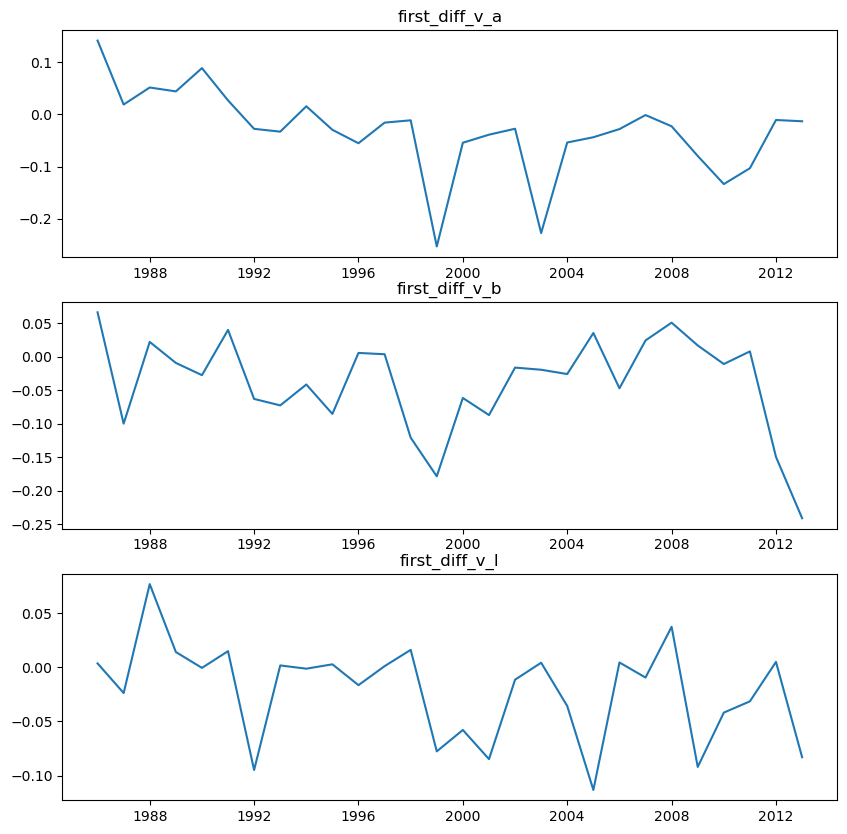

In [414]:
#Plot of training data
ts_model.plot();

Amount of data available here is much smaller, therefore harder to use more lags for more precision.


Overall, for both models, need more data for future analysis.


Also suggest interrupted time series analysis for time series of crime data, to look at the events that led to increase in crime/crackdown on crime around 2016.